In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nvg.ximu.ximudata as ximudata
import nvg.ximu.compare_to_mocap as compare
%matplotlib notebook

In [2]:
import nvg.io.qualisys_tsv as qtsv

In [3]:
#import datetime
#compare.check_sync()

In [4]:
#md = qtsv.loadQualisysTSVFile("/home/kjartan/Dropbox/projekt/nvg/data/solna09/S7/NVG_2012_S7_sync.tsv")

In [5]:
#synctime = md.timeStamp + datetime.timedelta(seconds=5199.0/md.frameRate)

In [6]:
#synctime

2012-09-19 11:11:37.528000
2012-09-19, 09:53:11.711492


<IPython.core.display.Javascript object>


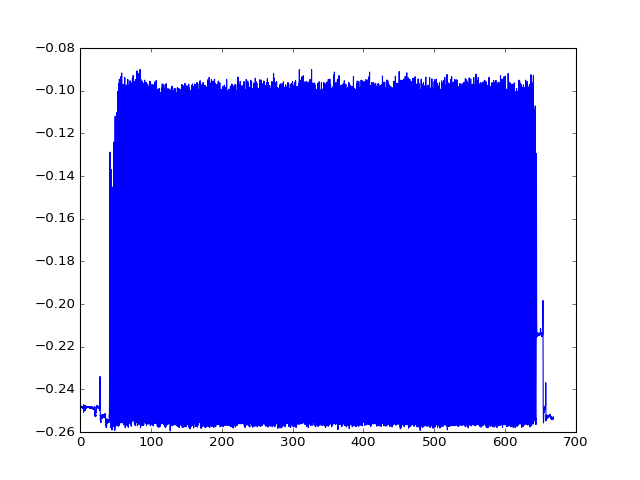

<IPython.core.display.Javascript object>


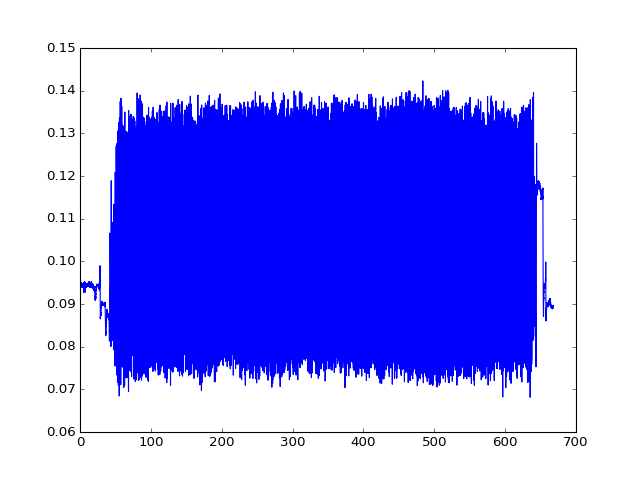

<IPython.core.display.Javascript object>


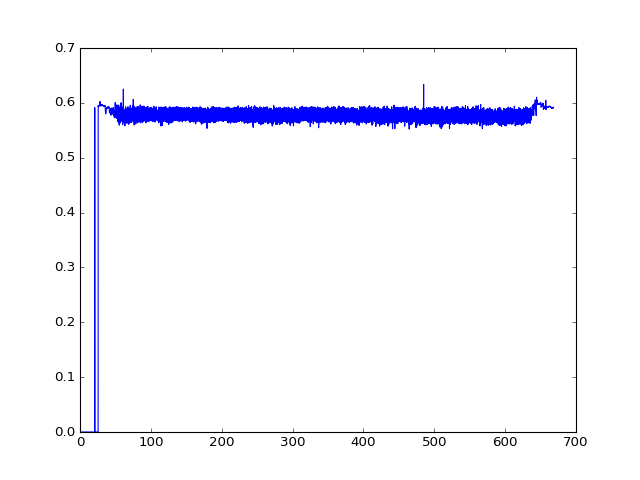

<IPython.core.display.Javascript object>


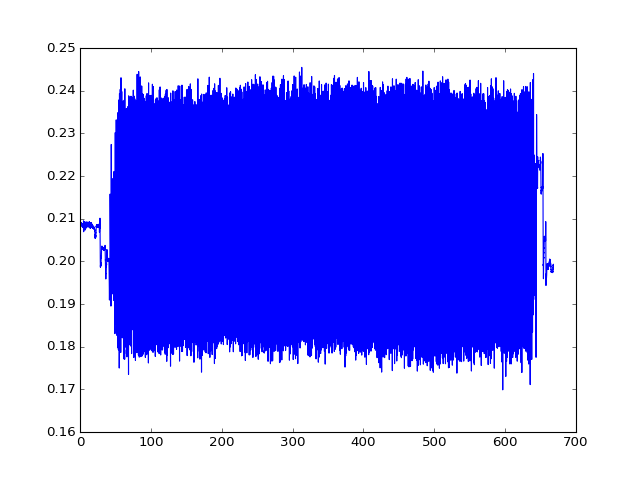

Using cyclic orientation method
Using cyclic orientation method


<IPython.core.display.Javascript object>


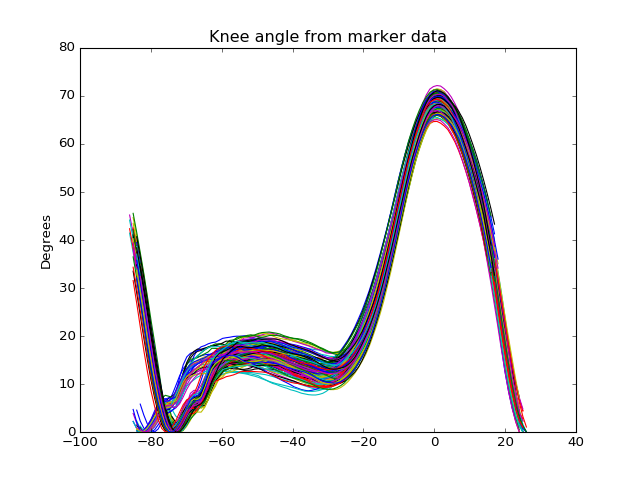

<IPython.core.display.Javascript object>


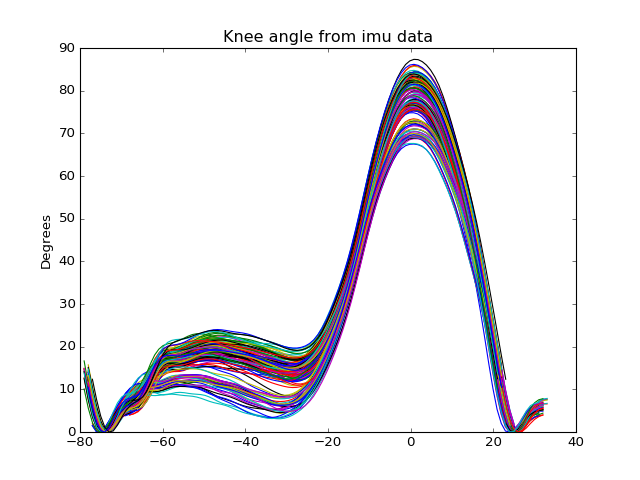

<IPython.core.display.Javascript object>


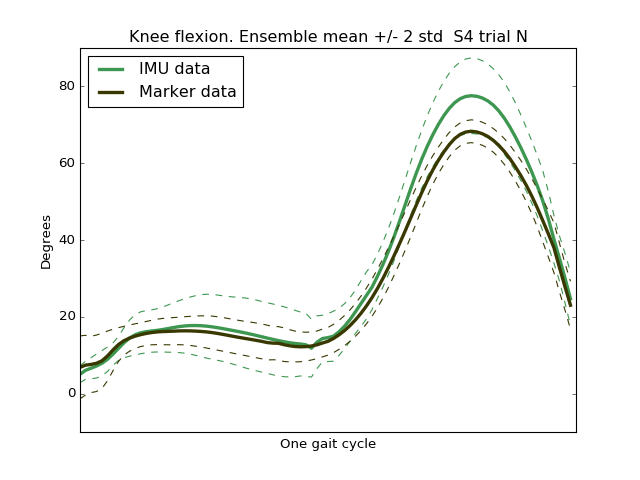

<IPython.core.display.Javascript object>


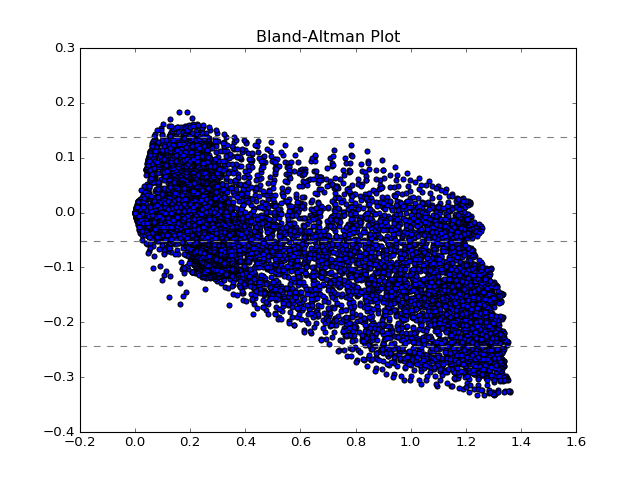

(<nvg.ximu.ximudata.NVGData instance at 0x7fbfdf363518>,
 <nvg.capture.marker.MarkerCapture at 0x7fc0184006d0>)

In [7]:
import pdb
compare.main_2017()

In [15]:
# Check the the correspondence between packet number and time
import numpy as np
from datetime import datetime, timedelta, date
fname = ("/media/ubuntu-15-10/home/kjartan/nvg/2012-09-19-S4/" 
        + "S4/LA-200/NVG_2012_S4_A_LA_00203_DateTime.csv")
packetTimeRaw = np.loadtxt(fname, dtype=np.int32, delimiter=',', skiprows=1)
times = [ datetime(year=pt_[1], month=pt_[2], day=pt_[3], 
                   hour=pt_[4], minute=pt_[5], second=pt_[6]) 
         for pt_ in packetTimeRaw ]
packetTime = np.asarray([ (packetTimeRaw[k,0]-packetTimeRaw[0,0], 
                           (times[k]-times[0]).total_seconds()) 
                         for k in range(len(times))])

In [17]:
Dp = (packetTime[-1,0] - packetTime[0,0])
Dt = (packetTime[-1,1] - packetTime[0,1])
freq = Dp/Dt
print freq


261.997857143
